In [67]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'apyori'

In [36]:
mydata=pd.read_csv('Groceries data.csv')

In [37]:
mydata.nunique()

Member_number      3898
Date                728
itemDescription     167
year                  2
month                12
day                  31
day_of_week           7
dtype: int64

In [38]:
mydata

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,6
38761,2022,2014-02-23,candy,2014,2,23,6
38762,1097,2014-04-16,cake bar,2014,4,16,2
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,2


In [39]:
mydata.value_counts(['itemDescription'])

itemDescription      
whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
preservation products       1
kitchen utensil             1
Length: 167, dtype: int64

In [40]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


In [41]:
mydata.isnull().sum().sort_values(ascending= False )

Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64

In [42]:
mydata['Date']=pd.to_datetime(mydata['Date'])
#mydata['itemDescription']=pd.to

In [43]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
 3   year             38765 non-null  int64         
 4   month            38765 non-null  int64         
 5   day              38765 non-null  int64         
 6   day_of_week      38765 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 2.1+ MB


In [44]:
mydata.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


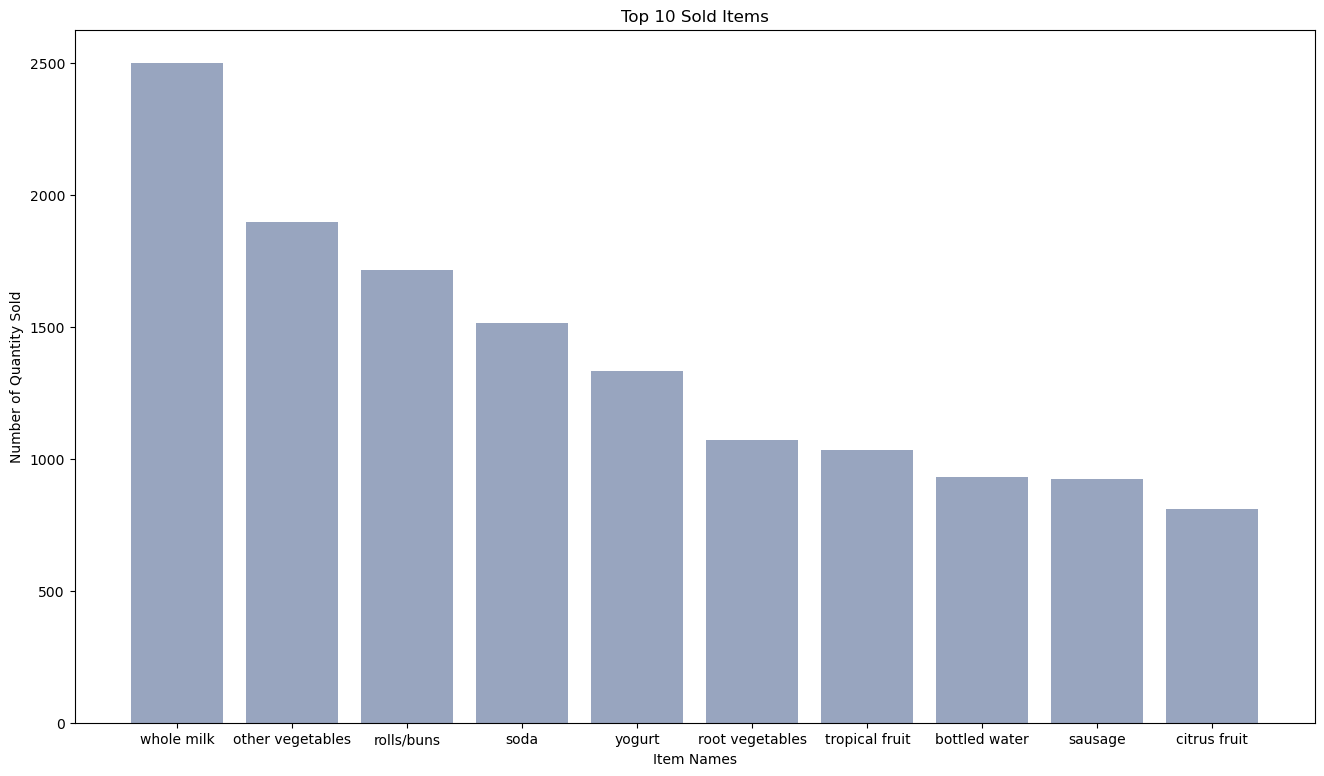

In [50]:
itemdist=mydata.groupby(by='itemDescription').size().reset_index(name='frequency').sort_values(by='frequency', ascending=False).head(10)
bars=itemdist['itemDescription']
height=itemdist['frequency']
x_pos=np.arange(len(bars))
plt.figure(figsize=(16,9))
plt.bar(x_pos, height, color=(0.2, 0.3,0.5, 0.5))
plt.title("Top 10 Sold Items")
plt.xlabel("Item Names")
plt.ylabel("Number of Quantity Sold")
plt.xticks(x_pos, bars)
plt.show()

In [53]:
mydata_date=mydata.set_index(['Date'])
mydata_date

,Member_number,itemDescription,year,month,day,day_of_week
Date,,,,,,
2015-07-21,1808,tropical fruit,2015,7,21,1
2015-05-01,2552,whole milk,2015,5,1,4
2015-09-19,2300,pip fruit,2015,9,19,5
2015-12-12,1187,other vegetables,2015,12,12,5
2015-01-02,3037,whole milk,2015,1,2,4
...,...,...,...,...,...,...
2014-08-10,4471,sliced cheese,2014,8,10,6
2014-02-23,2022,candy,2014,2,23,6
2014-04-16,1097,cake bar,2014,4,16,2


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Number of items sold by Month')]

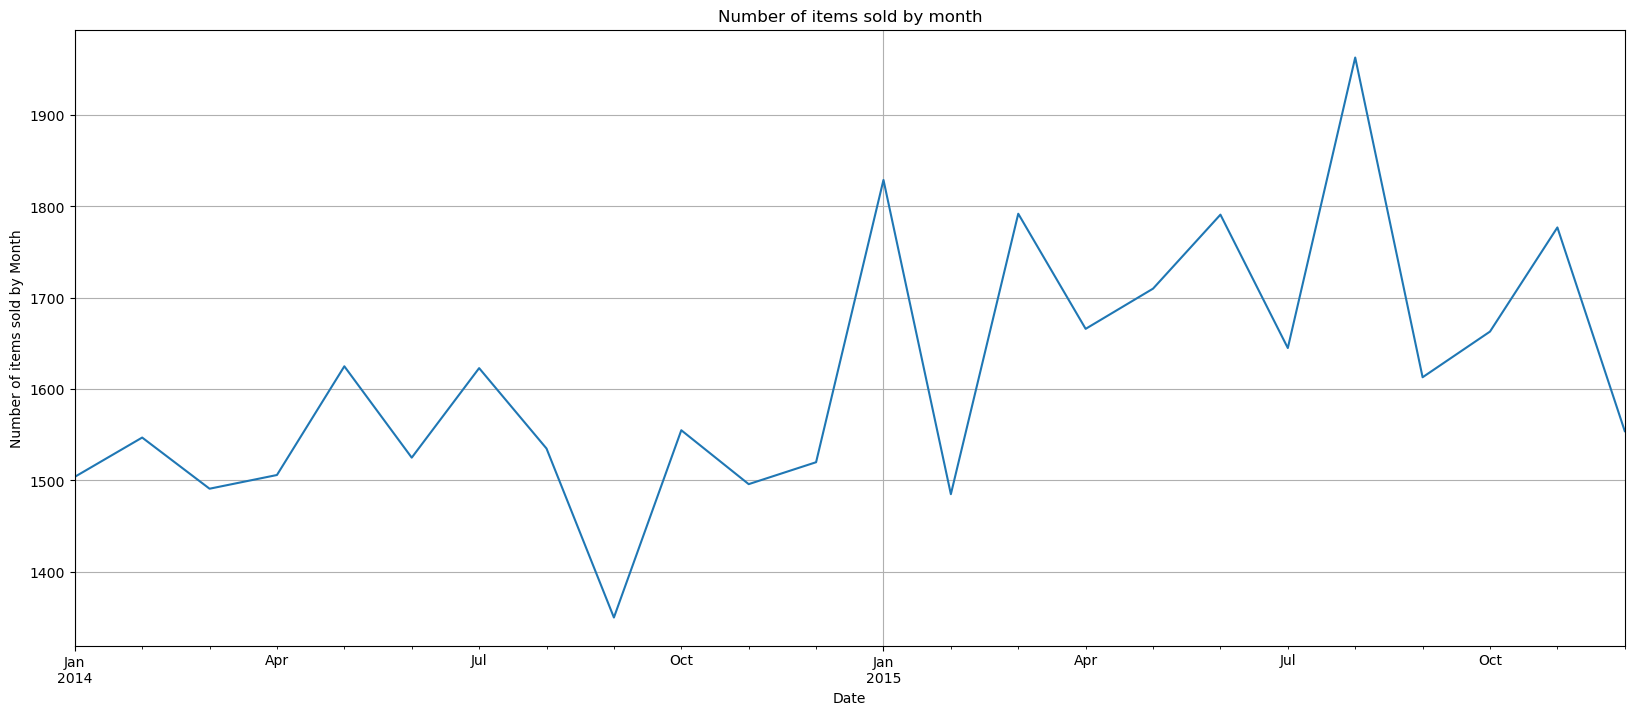

In [56]:
mydata_date.resample("M")["itemDescription"].count().plot(figsize=(20,8), grid= True, title="Number of items sold by month").set(xlabel='Date', ylabel='Number of items sold by Month')

In [59]:
customerlevel=mydata[['Member_number','itemDescription']].sort_values(by='Member_number', ascending=False)
customerlevel['itemDescription']=customerlevel['itemDescription'].str.strip()
customerlevel

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [62]:
transactions=[a[1]['itemDescription'].tolist() 
              for a in list(customerlevel.groupby(['Member_number']))]
transactions

[['misc. beverages',
  'sausage',
  'soda',
  'yogurt',
  'salty snack',
  'pastry',
  'canned beer',
  'hygiene articles',
  'whole milk',
  'pickled vegetables',
  'sausage',
  'semi-finished bread',
  'whole milk'],
 ['beef',
  'sausage',
  'frankfurter',
  'soda',
  'whipped/sour cream',
  'frankfurter',
  'rolls/buns',
  'soda',
  'white bread',
  'whole milk',
  'whole milk',
  'curd'],
 ['specialty chocolate',
  'butter',
  'whole milk',
  'butter milk',
  'tropical fruit',
  'sugar',
  'other vegetables',
  'frozen vegetables'],
 ['dental care',
  'rolls/buns',
  'rolls/buns',
  'frozen meals',
  'rolls/buns',
  'sausage',
  'detergent',
  'root vegetables'],
 ['frozen fish',
  'shopping bags',
  'hygiene articles',
  'rolls/buns',
  'whole milk',
  'canned beer',
  'root vegetables',
  'tropical fruit',
  'whole milk',
  'chocolate',
  'other vegetables',
  'red/blush wine',
  'pastry',
  'rolls/buns',
  'packaged fruit/vegetables',
  'dish cleaner',
  'pip fruit',
  'other ve